In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ridge regression

In [2]:
with open('data/3/hw1_ridge_x.dat') as f:
    x = np.array([ [float(oo) for oo in o.strip().split(',')] for o in f.readlines() if o.strip() != ''])
with open('data/3/hw1_ridge_y.dat') as f:
    y = np.array([ float(o) for o in f.readlines() if o.strip() != ''])

In [3]:
x_val, y_val = x[:10, :], y[:10]
x_train, y_train = x[10:, :], y[10:]

In [4]:
len(x_val), len(x_train)

(10, 40)

### 1. 

$w = (X^TX+n\lambda I)^{-1} X^T y $

In [11]:
def ridge_regression(train_x, train_y, l):
    w = np.linalg.inv(np.dot(train_x.T, train_x) + len(train_x) * l * np.identity(train_x.shape[1])).dot(np.dot(train_x.T, train_y))
    return w

In [12]:
print(f'weight theta is {ridge_regression(x_train, y_train, 0.15)}')

weight theta is [-0.57939825  1.15033028  0.04934122 -1.59867896]


### 2.

In [7]:
loss_function = lambda x, y, w: np.mean(np.square(np.dot(x, w)-y)/2)

In [17]:
train_loss, val_loss = [], []
r = np.arange(0, -5.1, -0.1)
for i in r:
    w = ridge_regression(x_train, y_train, 10**i)
    train_loss.append(loss_function(x_train, y_train, w))
    val_loss.append(loss_function(x_val, y_val, w))

Text(0, 0.5, 'log of losses')

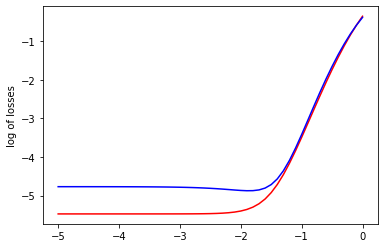

In [18]:
plt.plot(r, np.log(train_loss), 'r')
plt.plot(r, np.log(val_loss), 'b')
plt.ylabel('log of losses')

Text(0, 0.5, 'losses')

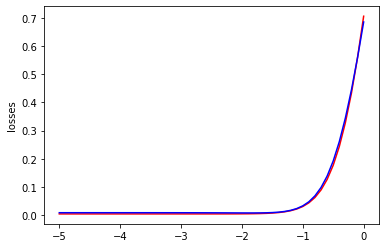

In [19]:
plt.plot(r, train_loss, 'r')
plt.plot(r, val_loss, 'b')
plt.ylabel('losses')

In [12]:
f"The best lambda for the validation dataset is {10**r[np.argmin(val_loss)]}"

'The best lambda for the validation dataset is 0.012589254117941668'